# 前言

在日常工作中，经常可以见到各种各种精美的热力图，热力图的应用非常广泛，下面一起来学习下Python的Seaborn库中热力图（heatmap）如何来进行使用。

本次运行的环境为：

+ windows 64位系统
+ python 3.5
+ jupyter notebook

# 1.构造数据

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
region = ['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bahamas', 'Bangladesh', 'Belize', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Cape Verde', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Cote d Ivoire', 'Cuba', 'Cyprus',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Ethiopia', 'Fiji',
       'Gambia', 'Georgia', 'Ghana', 'Guatemala', 'Guyana', 'Honduras']

In [4]:
kind = ['Afforestation & reforestation', 'Biofuels', 'Biogas',
        'Biomass', 'Cement', 'Energy efficiency', 'Fuel switch',
       'HFC reduction/avoidance', 'Hydro power',
        'Leak reduction', 'Material use', 'Methane avoidance',             
       'N2O decomposition', 'Other renewable energies',
       'PFC reduction and substitution','PV',
       'SF6 replacement', 'Transportation', 'Waste gas/heat utilization',
      'Wind power']

In [5]:
np.random.seed(100)
arr_region=np.random.choice(region,size=(10000,))
list_region=list(arr_region)

In [6]:
arr_kind=np.random.choice(kind,size=(10000,))
list_kind=list(arr_kind)

In [7]:
values=np.random.randint(50,1000,10000)
list_values=list(values)

In [8]:
df=pd.DataFrame({'region':list_region,'kind':list_kind,'values':list_values})

In [9]:
df.head()

,kind,region,values
0,Other renewable energies,Belize,74
1,Wind power,Cyprus,809
2,Material use,Argentina,593
3,HFC reduction/avoidance,Honduras,78
4,SF6 replacement,Cuba,206


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
kind      10000 non-null object
region    10000 non-null object
values    10000 non-null int64
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [11]:
df.describe()

,values
count,10000.000000
mean,525.379600
std,275.788375
min,50.000000
25%,286.000000
50%,524.500000
75%,764.000000
max,999.000000


In [12]:
pt=df.pivot_table(index='kind',columns='region',values='values',aggfunc=np.sum)

In [13]:
pt

region,Albania,Algeria,Angola,Argentina,Armenia,Azerbaijan,Bahamas,Bangladesh,Belize,Bhutan,...,El Salvador,Equatorial Guinea,Ethiopia,Fiji,Gambia,Georgia,Ghana,Guatemala,Guyana,Honduras
kind,,,,,,,,,,,,,,,,,,,,,
Afforestation & reforestation,5432,11676,6613,7570,4776,8941,5374,12947,4103,6257,...,5869,9744,6278,7281,6720,8856,5789,6587,6633,5289
Biofuels,6455,5128,8017,9016,8028,5995,5705,9404,7088,6510,...,6387,6042,7057,5320,5775,3621,8143,5889,5504,9459
Biogas,6691,5962,7253,9310,6153,8268,6420,6682,7111,6982,...,7657,7016,3334,6148,9031,3137,4468,5267,4501,4619
Biomass,9488,6292,7629,9487,6598,7922,6869,6007,5963,7537,...,5434,8764,4049,9007,8353,2800,5580,5532,5847,4811
Cement,2677,5759,5631,6666,9029,6712,7972,2894,7288,10161,...,9143,8585,2941,4523,4447,8909,4568,6169,10707,6357
Energy efficiency,7281,8274,5698,5883,9318,8217,10393,5051,6256,5644,...,4597,7400,5827,3824,4928,9195,3318,8084,7435,7523
Fuel switch,2689,7212,6073,5288,7539,5911,7381,6758,6380,6461,...,4421,5243,2912,6576,4495,3987,9181,3154,7192,8293
HFC reduction/avoidance,7571,5318,5999,5678,4770,10162,2120,7694,4434,8441,...,5778,4779,10574,4101,9109,6705,8341,12535,9344,5640
Hydro power,5888,4933,6088,11094,7235,4785,3825,6515,6565,5368,...,9258,6092,4895,3224,3845,5891,8218,8538,6045,7569


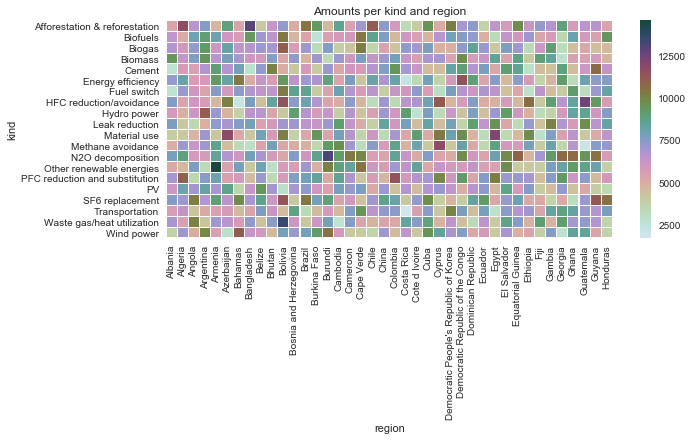

In [14]:
f,ax=plt.subplots(figsize=(10,4))
cmap=sns.cubehelix_palette(start=1,rot=3,gamma=0.8,as_cmap=True)
sns.heatmap(pt,cmap=cmap,linewidths=0.05,ax=ax)
ax.set_title('Amounts per kind and region')
ax.set_xlabel('region')
ax.set_ylabel('kind')
f.savefig('sns_heatmap_normal.jpg', bbox_inches='tight')
plt.show()

# 2 Seaborn的heatmap各个参数介绍

```
seaborn.heatmap(data, 
           vmin=None, 
           vmax=None, 
           cmap=None, 
           center=None,
           robust=False, 
           annot=None, 
           fmt='.2g', 
           annotkws=None, 
           linewidths=0,
           linecolor='white', 
           cbar=True, 
           cbarkws=None, 
           cbar_ax=None, 
           square=False, 
           ax=None, 
           xticklabels=True, 
           yticklabels=True, 
           mask=None, 
           **kwargs)
```

- data：矩阵数据集，可以使numpy的数组（array），如果是pandas的dataframe，则df的index/column信息会分别对应到heatmap的columns和rows
- linewidths,热力图矩阵之间的间隔大小
- vmax,vmin, 图例中最大值和最小值的显示值，没有该参数时默认不显示

## 2.1 cmap

- cmap：matplotlib的colormap名称或颜色对象；如果没有提供，默认为cubehelix map (数据集为连续数据集时) 或 RdBu_r (数据集为离散数据集时)

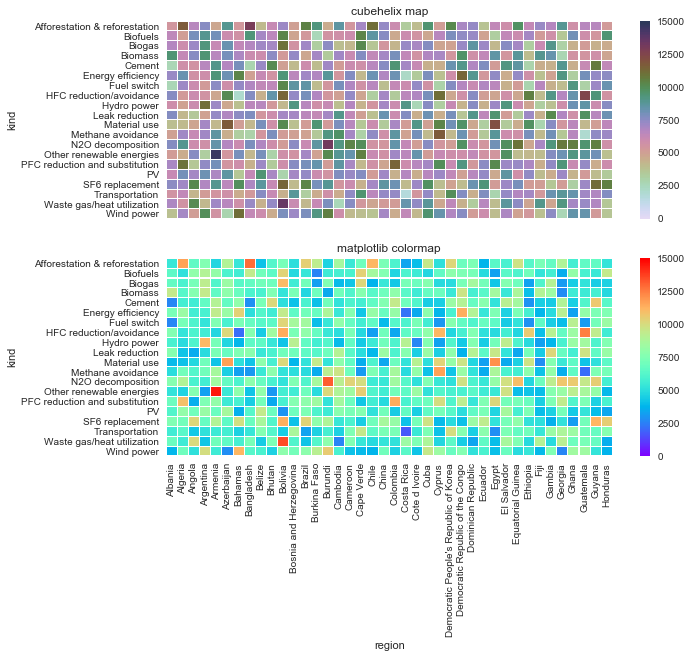

In [15]:
f,(ax1,ax2)=plt.subplots(figsize=(10,8),nrows=2)
# cubehelix map颜色
cmap=sns.cubehelix_palette(start=1.5,rot=3,gamma=0.8,as_cmap=True)
sns.heatmap(pt,linewidths=0.05,ax=ax1,vmax=15000,vmin=0,cmap=cmap)
ax1.set_title('cubehelix map')
ax1.set_xlabel('')
ax1.set_xticklabels([])# 设置X轴图例为空值
ax1.set_ylabel('kind')
# matplotlib colormap
sns.heatmap(pt,linewidths=0.05,ax=ax2,vmax=15000,vmin=0,cmap='rainbow')
ax2.set_title('matplotlib colormap')
ax2.set_xlabel('region')
ax2.set_ylabel('kind')
f.savefig('sns_heatmap_cmap.jpg',bbox_inches='tight')
plt.show()

## 2.2 center

- center:将数据设置为图例中的均值数据，即图例中心的数据值；通过设置center值，可以调整生成的图像颜色的整体深浅；设置center数据时，如果有数据溢出，则手动设置的vmax、vmin会自动改变

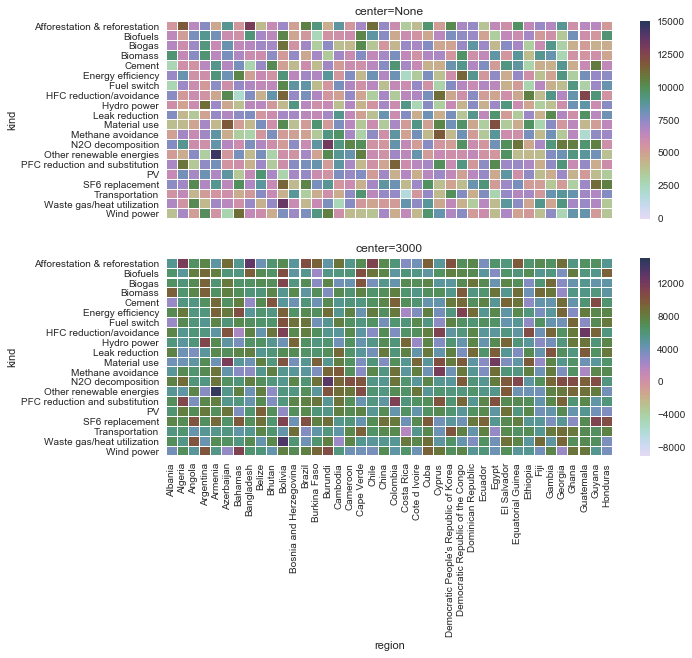

In [19]:
f,(ax1,ax2)=plt.subplots(figsize=(10,8),nrows=2)
cmap=sns.cubehelix_palette(start=1.5,rot=3,gamma=0.8,as_cmap=True)

sns.heatmap(pt,linewidths=0.05,ax=ax1,vmax=15000,vmin=0,cmap=cmap,center=None)
# center为None时，由于最小值为0，最大值为15000，相当于center值为7500
ax1.set_title('center=None')
ax1.set_xlabel('')
ax1.set_xticklabels([]) #设置x轴图例为空值
ax1.set_ylabel('kind')

sns.heatmap(pt,linewidths=0.05,ax=ax2,vmax=15000,vmin=0,cmap=cmap,center=3000)
# 由于均值为2000，当center设置为3000时，大部分数据会比7500大，所以center=3000时，生成的图片颜色要深
# 设置center数据时，如果有数据溢出，则手动设置的vmax或vmin会自动改变
ax2.set_title('center=3000')
ax2.set_xlabel('region')
ax2.set_ylabel('kind')
f.savefig('sns_heatmap_center.jpg',bbox_inches='tight')
plt.show()

## 2.3 robust

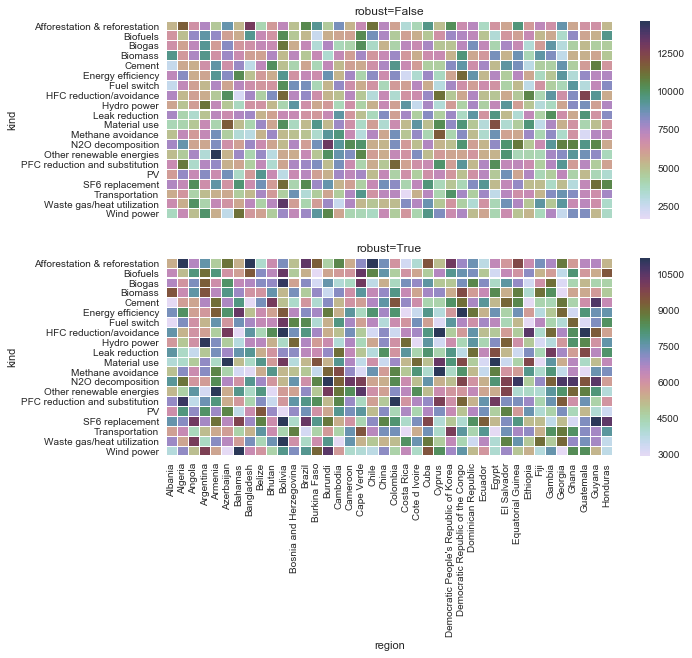

In [21]:
f,(ax1,ax2)=plt.subplots(figsize=(10,8),nrows=2)
cmap=sns.cubehelix_palette(start=1.5,rot=3,gamma=0.8,as_cmap=True)

sns.heatmap(pt,linewidths=0.05,ax=ax1,cmap=cmap,center=None,robust=False)
# robust默认为False
ax1.set_title('robust=False')
ax1.set_xlabel('')
ax1.set_xticklabels([]) #设置x轴图例为空值
ax1.set_ylabel('kind')

sns.heatmap(pt,linewidths=0.05,ax=ax2,cmap=cmap,center=None,robust=True)
# If True and vmin or vmax are absent, the colormap range is computed with robust 
# quantiles instead of the extreme values.
# 如果True和vmin或vmax不存在，则使用强分位数计算色彩图范围，而不是极值。
ax2.set_title('robust=True')
ax2.set_xlabel('region')
ax2.set_ylabel('kind')
f.savefig('sns_heatmap_robust.jpg',bbox_inches='tight')

## 2.4 mask

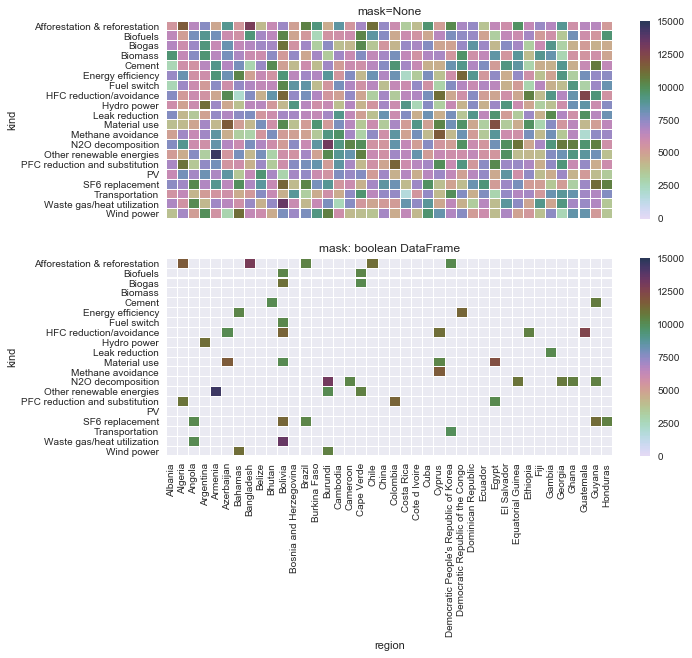

In [27]:
f, (ax1, ax2)=plt.subplots(figsize=(10, 8), nrows=2)
cmap=sns.cubehelix_palette(start=1.5, rot=3, gamma=0.8, as_cmap=True)

p1 = sns.heatmap(pt, linewidths = 0.05,ax=ax1, vmax=15000, vmin=0, cmap=cmap, center=None, robust=False, mask=None )
# robust默认为False
ax1.set_title('mask=None')
ax1.set_xlabel('')
ax1.set_xticklabels([]) #设置x轴图例为空值
ax1.set_ylabel('kind')

p2=sns.heatmap(pt,linewidths=0.05,ax=ax2,vmax=15000,vmin=0,cmap=cmap,center=None,robust=False,annot=False,mask=pt<10000)
# mask: boolean array or DataFrame
# 小于（或大于）某个值显示，其余不显示
ax2.set_title('mask: boolean DataFrame')
ax2.set_xlabel('region')
ax2.set_ylabel('kind')
f.savefig('sns_heatmap_mask.jpg', bbox_inches='tight')
plt.show()

## 2.5 xticklabels, yticklabels

- xticklabels: 如果是True，则绘制dataframe的列名。如果是False，则不绘制列名。如果是列表，则绘制列表中的内容作为xticklabels。 如果是整数n，则绘制列名，但每个n绘制一个label。 默认为True。
- yticklabels: 如果是True，则绘制dataframe的行名。如果是False，则不绘制行名。如果是列表，则绘制列表中的内容作为yticklabels。 如果是整数n，则绘制列名，但每个n绘制一个label。 默认为True。

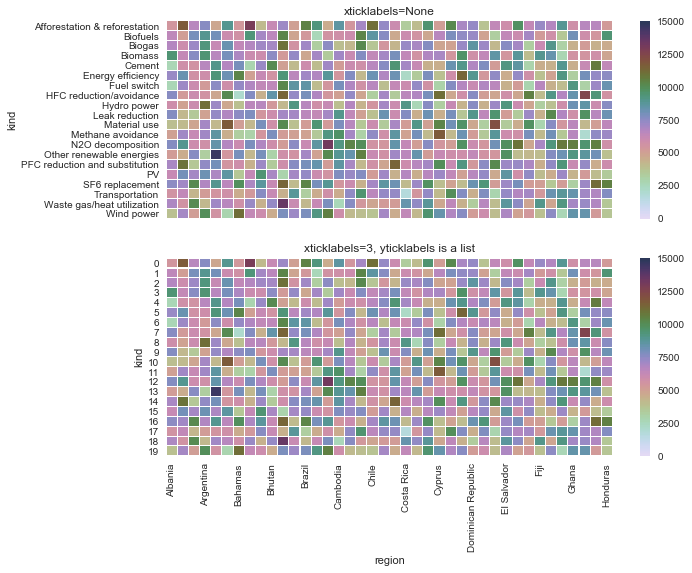

In [30]:
f,(ax1,ax2)=plt.subplots(figsize=(10,8),nrows=2)
cmap=sns.cubehelix_palette(start=1.5,rot=3,gamma=0.8,as_cmap=True)

p1=sns.heatmap(pt,linewidths=0.05,ax=ax1,vmax=15000,vmin=0,cmap=cmap,center=None,robust=False,mask=None,xticklabels=False)
# robust默认为False
ax1.set_title('xticklabels=None')
ax1.set_xlabel('')
# ax1.set_xticklabels([]) #设置x轴图例为空值
ax1.set_ylabel('kind')

p2=sns.heatmap(pt,linewidths=0.05,ax=ax2,vmax=15000,vmin=0,cmap=cmap,center=None,robust=False, annot=False, mask=None, xticklabels=3,yticklabels=list(range(20)) )
# xticklabels=3,则表示每隔3列绘制
ax2.set_title('xticklabels=3, yticklabels is a list')
ax2.set_xlabel('region')
ax2.set_ylabel('kind')
f.savefig('sns_heatmap_xyticklabels.jpg', bbox_inches='tight')
plt.show()

## 2.6 annot

- annotate的缩写，annot默认为False，当annot为True时，在heatmap中每个方格写入数据
- annot_kws，当annot为True时，可设置各个参数，包括大小，颜色，加粗，斜体字等

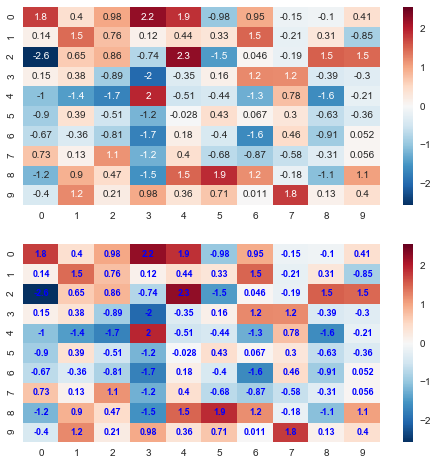

In [31]:
np.random.seed(0)
x=np.random.randn(10,10)
f,(ax1,ax2)=plt.subplots(figsize=(8,8),nrows=2)
sns.heatmap(x,annot=True,ax=ax1)
sns.heatmap(x,annot=True,ax=ax2,annot_kws={'size':9,'weight':'bold','color':'blue'})
# Keyword arguments for ax.text when annot is True.
# http://stackoverflow.com/questions/35024475/seaborn-heatmap-key-words
f.savefig('sns_heatmap_annot.jpg')

**关于annot_kws的设置，还有很多值得研究的地方，ax.text有很多属性，有兴趣的可以去研究下；

ax.text可参考官方文档:[matplotlib.org/api/text...](http://matplotlib.org/api/text_api.html#matplotlib.text.Text)

## 2.7 fmt

- fmt，格式设置

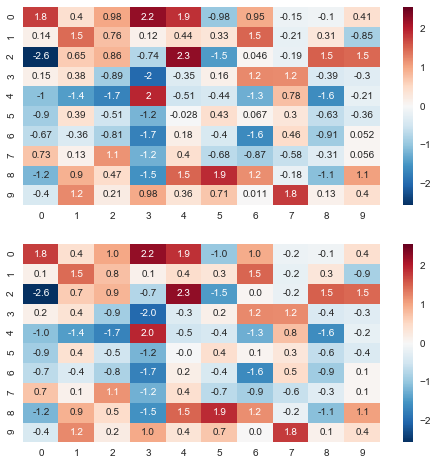

In [33]:
np.random.seed(0)
x=np.random.randn(10,10)
f,(ax1,ax2)=plt.subplots(figsize=(8,8),nrows=2)
sns.heatmap(x,annot=True,ax=ax1)
sns.heatmap(x,annot=True,fmt='.1f',ax=ax2)
# 浮点数位数
f.savefig('sns_heatmap_fmt.jpg')

# 3 案例应用：突出显示某些数据

## 3.1 method 1：利用mask来实现

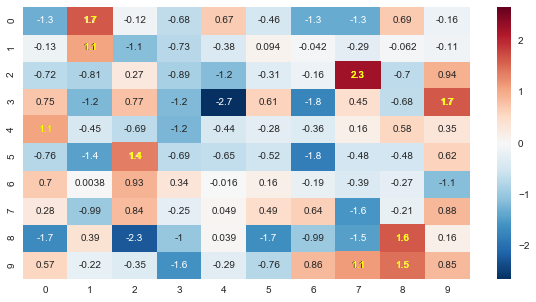

In [36]:
f,ax=plt.subplots(figsize=(10,5))
x=np.random.randn(10,10)
sns.heatmap(x,annot=True,ax=ax)
sns.heatmap(x,annot=True,ax=ax,mask=x<1,cbar=False,annot_kws={'weight':'bold','color':'yellow'})
f.savefig('sns_heatmap_eg1.jpg')

## 3.2 method 2：利用ax.texts来实现

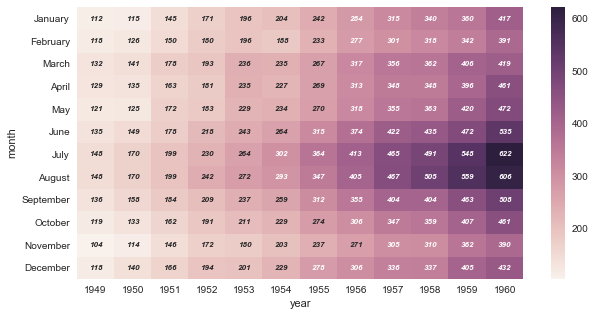

In [38]:
f,ax=plt.subplots(figsize=(10,5))
flights=sns.load_dataset('flights')
flights=flights.pivot('month','year','passengers')
pic=sns.heatmap(flights,annot=True,fmt='d',ax=ax)
for text in pic.texts:
    text.set_size(8)
    text.set_weight('bold')
    text.set_style('italic')
f.savefig('sns_heatmap_eg2.jpg')